In [1]:
import torch.utils.data as data
import cv2
import numpy as np
import matplotlib.pyplot as plt
from data_loader import get_loader
from matchmap_visualize import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [13]:
# Load Model
model_name = 'models/npairs_loss_model.tar'
image_model, caption_model = load_model(model_path = model_name)

Loaded checkpoint 'models/npairs_loss_model.tar' (epoch 34)


## MSCOCO Dataset

In [42]:
# Load a batch of triplet of data

batch_size = 5
image_tensor, caption_glove_tensor, caption_list = get_data(batch_size, dataset = 'mscoco')

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!
Obtaining caption lengths...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202654/202654 [00:19<00:00, 10636.15it/s]


In [44]:
matchmaps = gen_matchmap(image_model, caption_model, image_tensor, caption_glove_tensor)

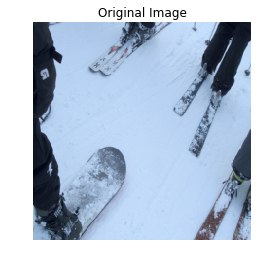

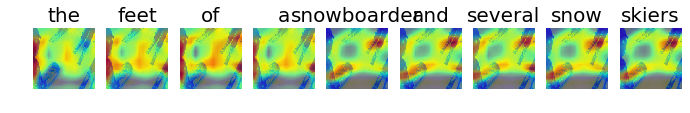

In [49]:
index = 3
name = str(index)
color_img, bw_img, mask_list, caption = gen_masks(matchmaps, image_tensor, 
                                                 caption_list, index)
gen_results(color_img, bw_img, mask_list, caption, name = name, save_flag=False)

## Flickr30K Entities

In [50]:
image_tensor, caption_glove_tensor, caption_list = get_data(batch_size, dataset='flickr30k')

In [51]:
matchmaps = gen_matchmap(image_model, caption_model, image_tensor, caption_glove_tensor)

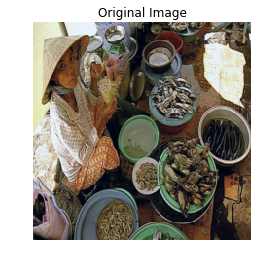

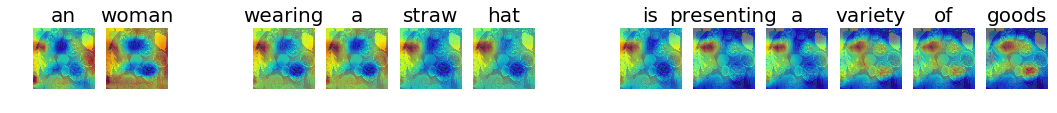

In [53]:
index = 1
name = str(index)
color_img, bw_img, mask_list, caption = gen_masks(matchmaps, image_tensor, 
                                                 caption_list, index)
gen_results(color_img, bw_img, mask_list, caption, name = name, save_flag=False)